# Setup

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# [20 Points] Task 01 - Functions of Gaussian Random Variable

Gaussian/Normal random variables are the most common type of random variables. They are characterized by a mean $\mu$ and a standard deviation $\sigma$. The probability density function of a Gaussian/Normal random variable is given by
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
The standard normal distribution is the distribution of the Normal random variable with mean 0 and standard deviation 1 which is denoted by $ X \sim \mathcal{N}(0,1)$. In this task, you are required to comment on the PDF shape of different functions of a Gaussian random variables.  

The following code generates 10,000 samples of $X$ random variable and plots an approximate PDF of $X$ (based on its 10,000 samples) using the displot() function of Seaborn library. 

Modify the code to also plot the approximate PDF of $Y=20X+500$ and $Z=X^2+X+500$.



Comment on the PDF shapes of $Y$ and $Z$, compared to $X$. 

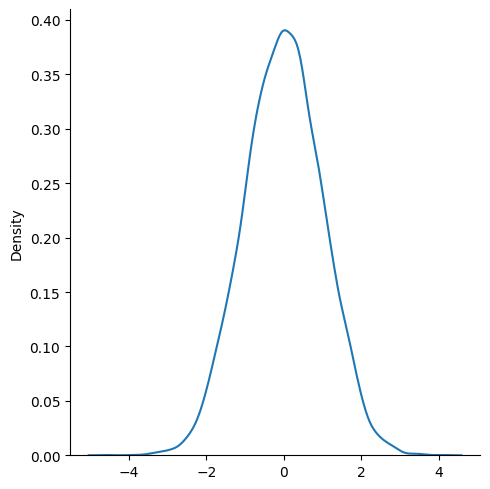

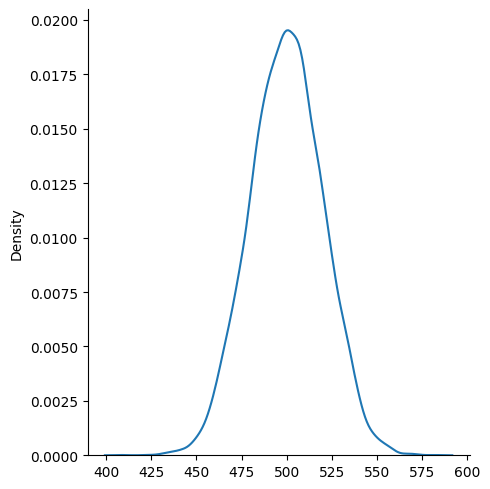

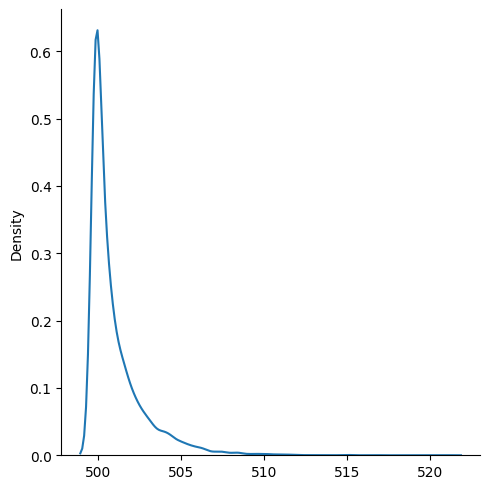

In [ ]:
sample_size = 10000

x_sample = np.random.normal(0, 1, sample_size)

y_sample = 20*x_sample + 500

z_sample = x_sample**2 + x_sample + 500

sns.displot(data=x_sample, kind="kde", label="X")

sns.displot(data=y_sample, kind="kde", label="Y")

sns.displot(data=z_sample, kind="kde", label="Z")


**Comments**

The PDF shape of Y is similar to X, but scaled by a factor of 20 and shifted by 500. It looks much narrower and is shorter than PDF of X.

The PDF shape of Z is different from X, as it is a quadratic transformation of X. It has a higher peak and a wider spread than X.

# [30 points] Task 02 - Central Limit Theorem

Suppose $X_1,X_2, \cdots, X_n$ are independent random variables with the same underlying distribution. In this case, we say that the $X_i$ are independent and identically distributed or i.i.d. In particular, the $X_i$, all have the same mean $\mu$ and standard deviation $\sigma$.

Let $S_n$ be the sum of $n$ i.i.d random variables:
$$ S_n = X_1 + X_2 + \cdots + X_n $$


## [10 points] Part A: Uniform Random Variable
In this part, we consider $X_i$s to be continuous uniform random variables. The following code generates 10,000 samples of $X_1$ random variable and plots an approximate PDF of $X_1$ (based on its 10,000 samples) using the displot() function of Seaborn library. 

Modify the given code to generate 10,000 samples of $X_2,X_3, \cdots, X_n$, and plot the approximate PDF of $S_n$ using the displot() function of Seaborn library for the following values of n: 1,2,3,5,10,50,100.

Comment on the evolution of PDF shape of $S_n$ as n increases. 

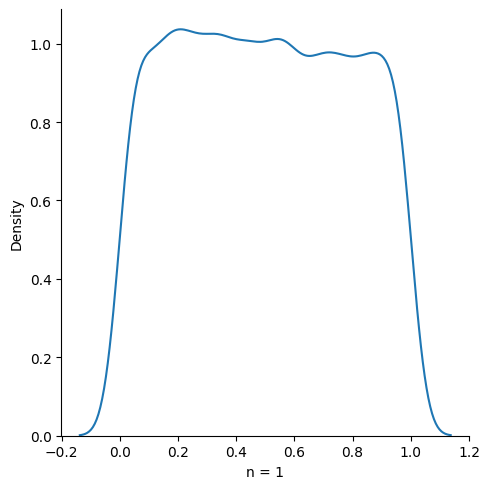

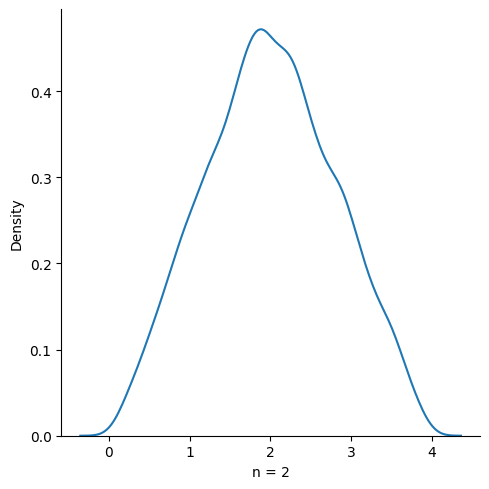

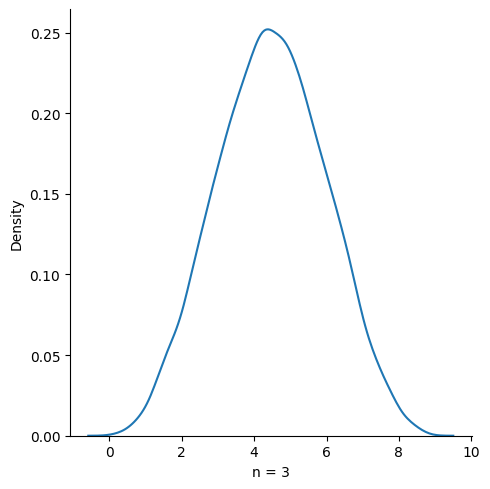

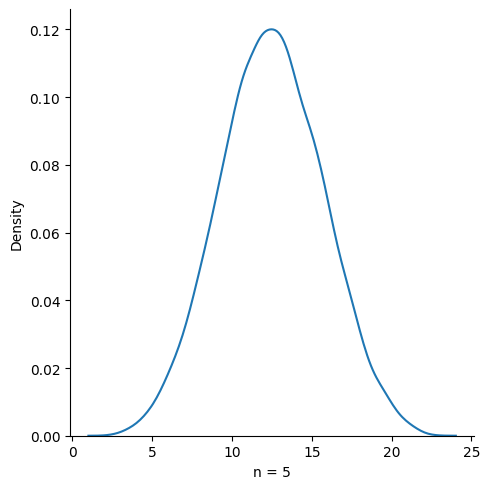

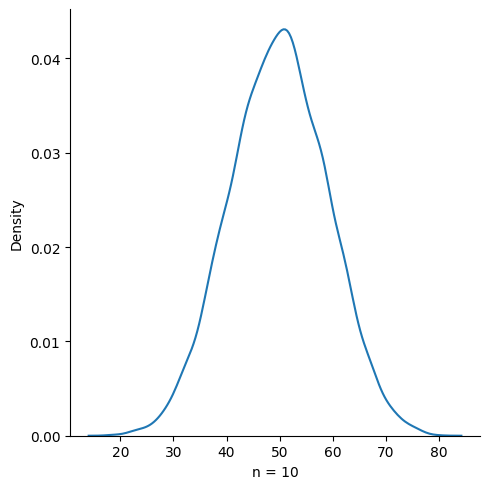

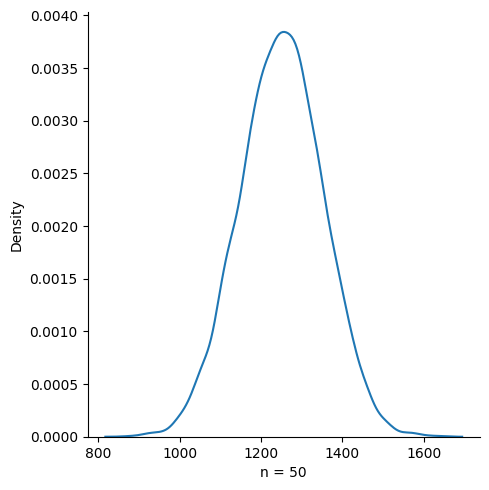

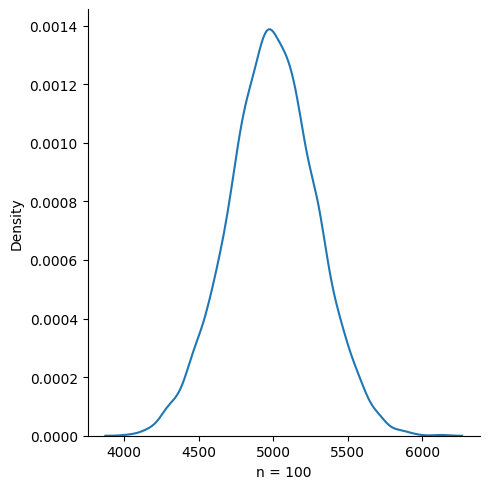

In [31]:
# sample_size = 10000

# df = pd.DataFrame()
# x1_sample = np.random.uniform(0, 1, sample_size)

# i = 1
# col = f'x{i} sample'
# df[col] = x1_sample

# sns.displot(data=df[col], kind="kde")


# Generate samples for x2, x3, ..., xn
# n_values = [1, 2, 3, 5, 10, 50, 100]
# for i in range(1, max(n_values) + 1):
#     col = f'x{i} sample'
#     df[col] = np.random.uniform(0, 1, sample_size)
#     sns.displot(data=df[col], kind="kde")


# Plot the PDF of Sn for different values of n
# sns.displot(data=df[n_values].sum(axis=1), kind="kde", hue=n_values)

sample_size = 10000
df = pd.DataFrame()
for i in [1,2,3,5,10,50,100]:
  uniform_X = np.random.uniform(0, i, (sample_size, i))
  S = np.sum(uniform_X, axis=1)
  col = f'n = {i}'
  df[col] = S
  sns.displot(data=df[col], kind="kde")

    
    # sns.displot(data=df['n = ' + str(n)], kind='kde')


**Comments**

As n increases, PDF of Sn becomes narrower and more bell-shaped, resembling normal distribution curve. This is due to the central limit theorem, which states that the sum of a large number of i.i.d. random variables follow normal distribution.

With the increase of n, the ends of the curve are further from the extreme values (0 and the value of n).

## [10 points] Part B: Exponential Random Variable
In this part, we consider $X_i$s to be exponential random variables. The following code generates 10,000 samples of $X_1$ random variable and plots an approximate PDF of $X_1$ (based on its 10,000 samples) using the displot() function of Seaborn library. 

Modify the given code to generate 10,000 samples of $X_2,X_3, \cdots, X_n$, and plot the approximate PDF of $S_n$ using the displot() function of Seaborn library for the following values of n: 1,2,3,5,10,50,100.

Comment on the evolution of PDF shape of $S_n$ as n increases. 

<ipython-input-18-fb48f34a2cbc>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['n = ' + str(n)] = sn_samples


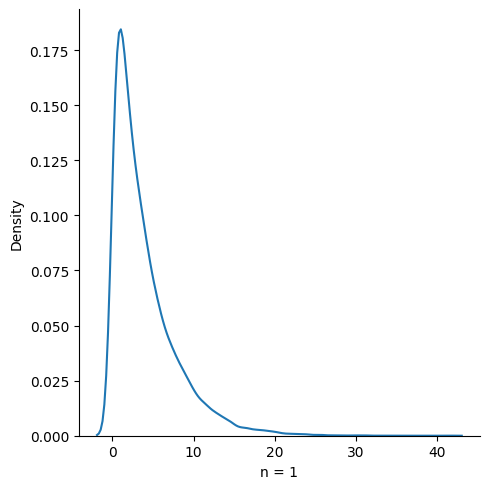

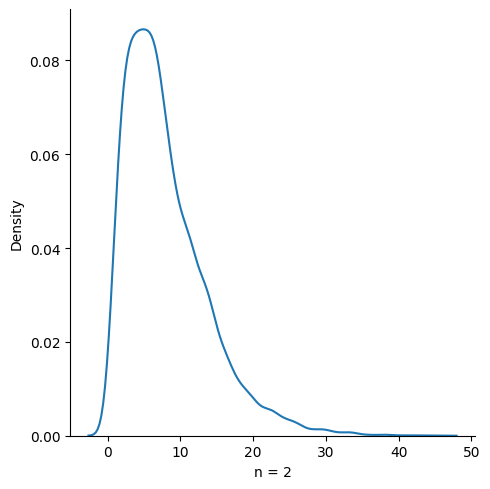

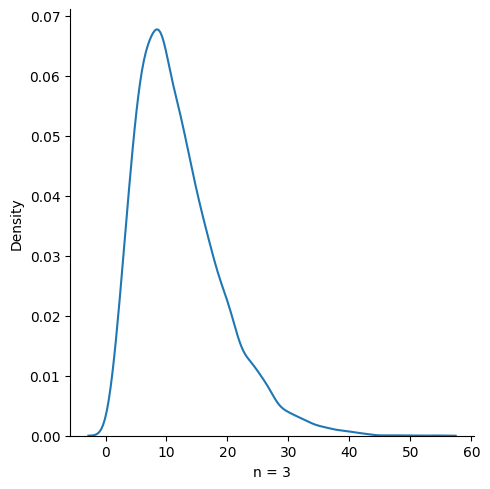

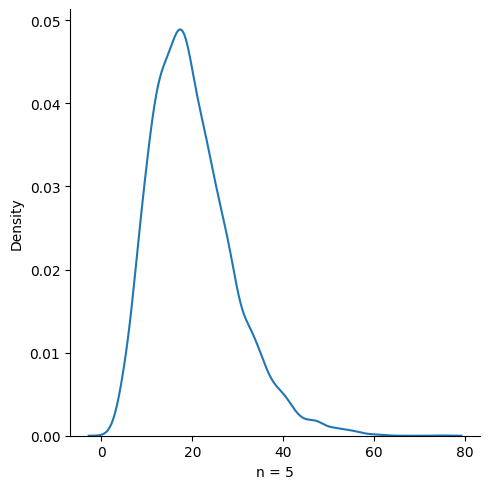

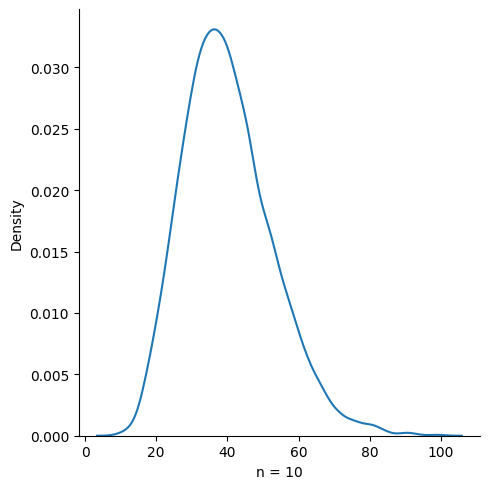

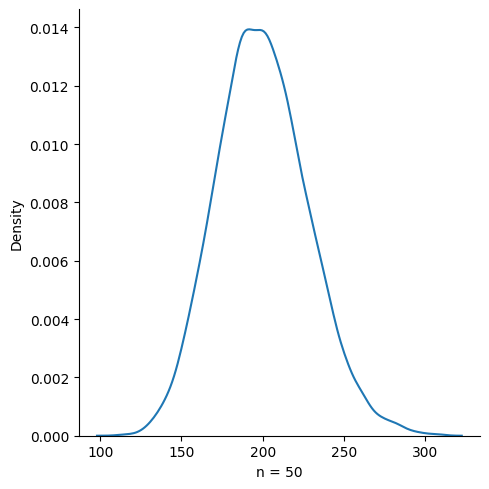

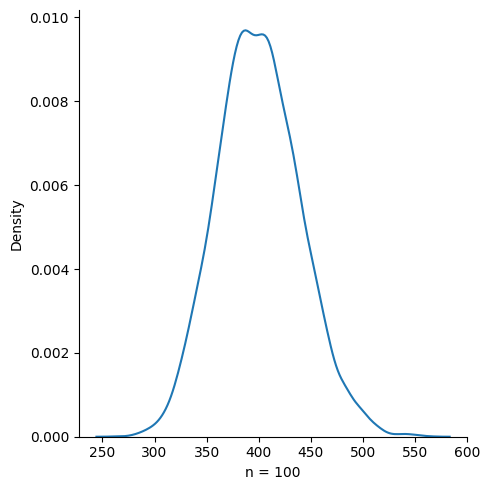

In [18]:
sample_size = 10000
n_values = [1, 2, 3, 5, 10, 50, 100]
rate = 0.25

for n in n_values:
    df = pd.DataFrame()
    xi_samples = np.random.exponential((1/rate), (sample_size, n))
    sn_samples = np.sum(xi_samples, axis=1)
    
    for i in range(n):
        col = f'x{i+1} sample'
        df[col] = xi_samples[:, i]
    
    df['n = ' + str(n)] = sn_samples
    
    sns.displot(data=df['n = ' + str(n)], kind='kde')


**Comments**

As n increases, the PDF is skewed to the right, becoming more symmetric, and concentrated around its mean value (which is proportional to the product of n and the rate parameter), resembling bell-shaped normal distribution.

This is also due to the central limit theorem, which applies to a sum of independent random variables with finite means and variances.

## [10 points] Part C: Binomial Random Variable
In this part, we consider $X_i$s to be binomial random variables. The following code generates 10,000 samples of $X_1$ random variable and plots an approximate PDF of $X_1$ (based on its 10,000 samples) using the displot() function of Seaborn library. 

Modify the given code to generate 10,000 samples of $X_2,X_3, \cdots, X_n$, and plot the approximate PDF of $S_n$ using the displot() function of Seaborn library for the following values of n: 1,2,3,5,10,50,100.

Comment on the evolution of PDF shape of $S_n$ as n increases. 

<ipython-input-22-dc5c7bf010d6>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['n = ' + str(n)] = sn_samples


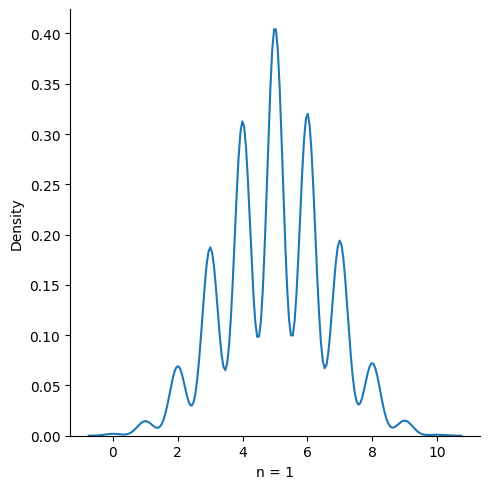

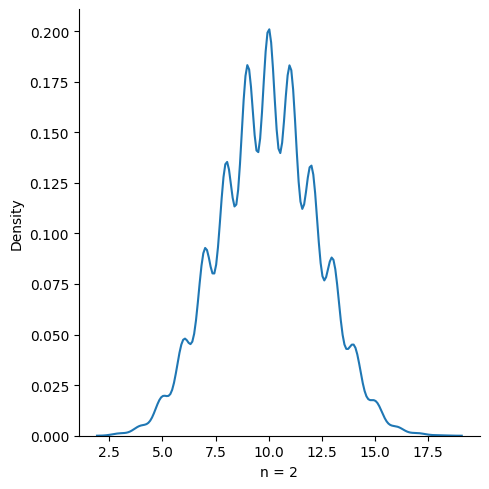

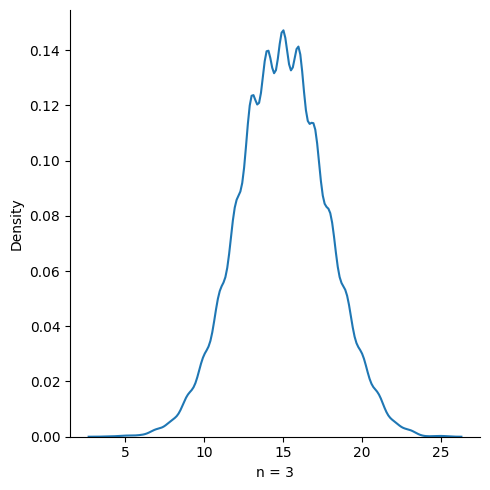

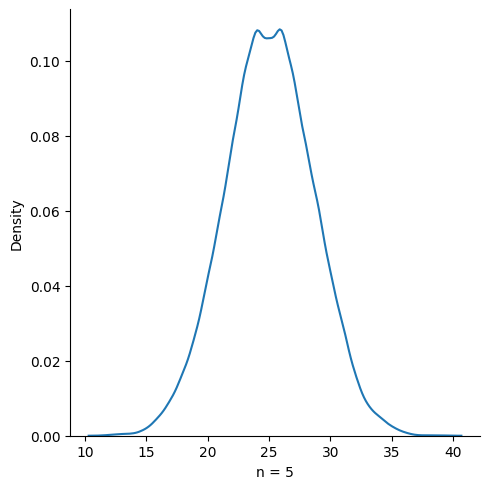

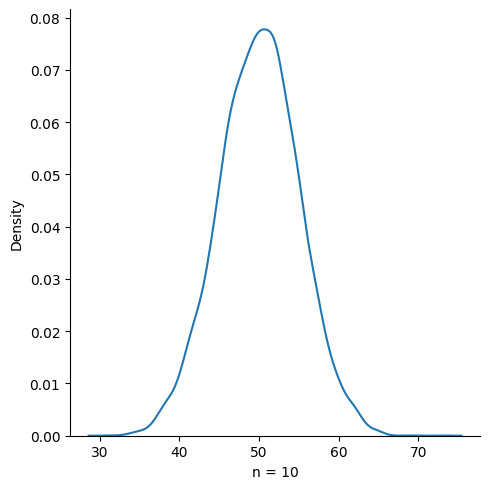

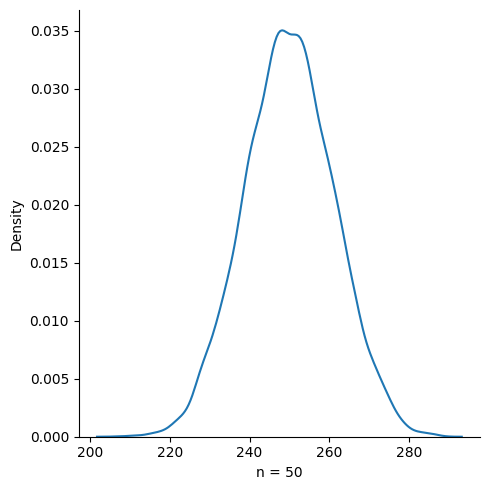

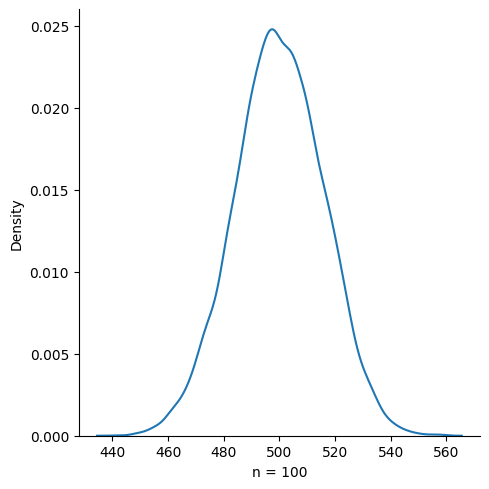

In [22]:
sample_size = 10000
n_values = [1, 2, 3, 5, 10, 50, 100]
n_trials = 10
p = 0.5

for n in n_values:
    df = pd.DataFrame()
    xi_samples = np.random.binomial(n_trials, p, (sample_size, n))
    sn_samples = np.sum(xi_samples, axis=1)
    
    for i in range(n):
        col = f'x{i+1} sample'
        df[col] = xi_samples[:, i]
    
    df['n = ' + str(n)] = sn_samples
    
    sns.displot(data=df['n = ' + str(n)], kind='kde')

**Comments**

The PDF of Sn has a more discrete shape, with visible peaks and troughs, especially for small values of n. As n increases, the PDF of Sn becomes smoother, more symmetric and concentrated around its mean value, resembling normal distribution. This is also due to the central limit theorem. The number of peaks also decrease with the increase in the value of n.